# scenario 1


/tmp/ipykernel_101360/3817441220.py:76: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(noise_class[:, 0], noise_class[:, 1], c=noise_colors[i], marker='x', s=100, edgecolor='black')
/tmp/ipykernel_101360/3817441220.py:76: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(noise_class[:, 0], noise_class[:, 1], c=noise_colors[i], marker='x', s=100, edgecolor='black')
/tmp/ipykernel_101360/3817441220.py:76: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(noise_class[:, 0], noise_class[:, 1], c=noise_colors[i], marker='x', s=1

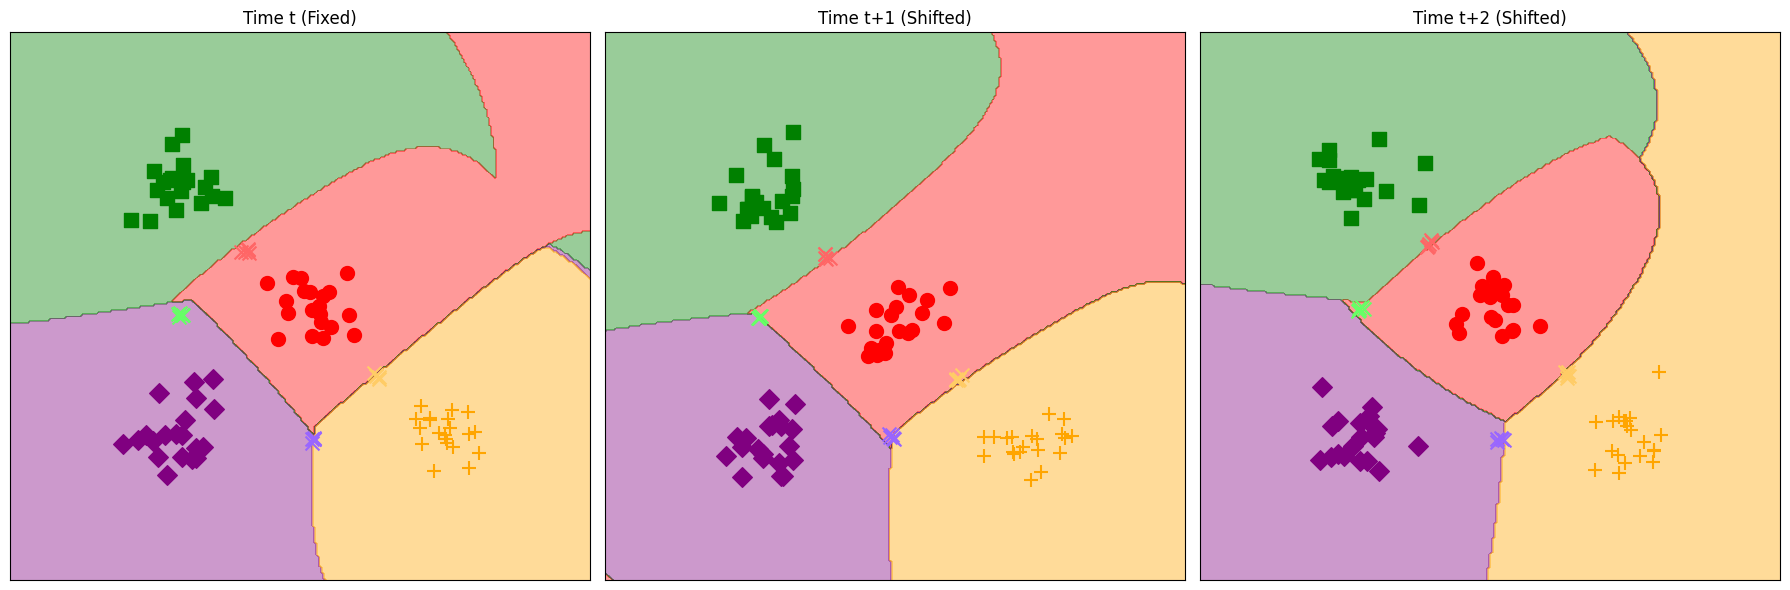

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

# Settings
num_classes = 4  # 类的数量
points_per_class = 20
scaling_factor_no_overlap = 0.5
boundary_noise = 0.05  # 更小的噪声偏移，使噪声点更靠近边界
num_noise_points = 5  # 每个类别的噪声点数量
distinct_colors = ["#FFAAAA", "#AAFFAA", "#FFC0CB", "#FFFFAA"]  # 去掉蓝色
colors = ["red", "green", "purple", "orange"]  # 去掉蓝色
noise_colors = [
    "#FF6666",
    "#66FF66",
    "#9966FF",
    "#FFCC66",
]  # 与类别颜色稍微不同的噪声点颜色
class_markers = ["o", "s", "D", "+"]

# Generate initial class centers (去掉蓝色类对应的中心 [3, 3])
class_centers = np.array([[0, 0], [-3, 3], [-3, -3], [3, -3]])

# Generate points for each class at time t
points = np.vstack(
    [
        np.random.randn(points_per_class, 2) * scaling_factor_no_overlap + center
        for center in class_centers
    ]
)

# Generate noise points near the boundaries of adjacent classes (跨类生成噪声点，距离边界更近)
noise_points = np.vstack(
    [
        np.random.randn(num_noise_points, 2) * boundary_noise
        + (class_centers[i] + class_centers[(i + 1) % num_classes]) / 2
        for i in range(num_classes)
    ]
)

# Labels for the points and noise points
labels = np.repeat(np.arange(num_classes), points_per_class)
noise_labels = np.repeat(np.arange(num_classes), num_noise_points)

# Standardize the initial points for better SVM results
scaler = StandardScaler()
points_standardized = scaler.fit_transform(points)
noise_points_standardized = scaler.transform(noise_points)

# Train an SVM classifier
svm = SVC(kernel="rbf", C=1.0, gamma=0.7)
svm.fit(points_standardized, labels)


# Create a function to plot the decision boundaries
def plot_decision_boundaries(
    points, noise_points, labels, noise_labels, svm_model, ax, title
):
    h = 0.02
    x_min, x_max = points[:, 0].min() - 1, points[:, 0].max() + 1
    y_min, y_max = points[:, 1].min() - 1, points[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the decision boundaries for each point in the mesh
    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Ensure background matches the correct class label colors
    color_map = {i: colors[i] for i in range(num_classes)}  # Map labels to colors
    background_colors = [color_map[label] for label in range(num_classes)]

    # Create a custom colormap with the exact number of distinct colors as classes
    ax.contourf(
        xx, yy, Z, alpha=0.4, cmap=ListedColormap([color_map[i] for i in np.unique(Z)])
    )

    # Plot the points with matching colors
    for i in range(num_classes):
        points_class = points[labels == i]
        ax.scatter(
            points_class[:, 0],
            points_class[:, 1],
            c=colors[i],
            marker=class_markers[i],
            s=100,
        )

    # Plot noise points with similar but different colors to represent noise
    for i in range(num_classes):
        noise_class = noise_points[noise_labels == i]
        ax.scatter(
            noise_class[:, 0],
            noise_class[:, 1],
            c=noise_colors[i],
            marker="x",
            s=100,
            edgecolor="black",
        )

    # Hide the x and y ticks
    ax.set_xticks([])
    ax.set_yticks([])

    ax.set_title(title)


# Apply this updated plotting function to the time steps as in the original code.

# Plot for each time step
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for time t
plot_decision_boundaries(
    points_standardized,
    noise_points_standardized,
    labels,
    noise_labels,
    svm,
    axes[0],
    "Time t (Fixed)",
)

# Apply smooth small shifts to centers for simulating time progression
smooth_shift_t1 = np.array([[0.1, 0.1], [0.1, 0.1], [0.1, 0.1], [0.1, 0.1]])
smooth_shift_t2 = np.array([[0.2, 0.2], [0.2, 0.2], [0.2, 0.2], [0.2, 0.2]])

# Adjust the class centers to simulate domain shift over time
shifted_class_centers_t1 = class_centers + smooth_shift_t1
shifted_class_centers_t2 = shifted_class_centers_t1 + smooth_shift_t2

# Generate points for each time step
points_t1 = np.vstack(
    [
        np.random.randn(points_per_class, 2) * scaling_factor_no_overlap + center
        for center in shifted_class_centers_t1
    ]
)
points_t2 = np.vstack(
    [
        np.random.randn(points_per_class, 2) * scaling_factor_no_overlap + center
        for center in shifted_class_centers_t2
    ]
)

# Generate noise points for each time step (跨类噪声点，距离边界更近)
noise_points_t1 = np.vstack(
    [
        np.random.randn(num_noise_points, 2) * boundary_noise
        + (
            shifted_class_centers_t1[i]
            + shifted_class_centers_t1[(i + 1) % num_classes]
        )
        / 2
        for i in range(num_classes)
    ]
)
noise_points_t2 = np.vstack(
    [
        np.random.randn(num_noise_points, 2) * boundary_noise
        + (
            shifted_class_centers_t2[i]
            + shifted_class_centers_t2[(i + 1) % num_classes]
        )
        / 2
        for i in range(num_classes)
    ]
)

# Standardize new points
points_t1_standardized = scaler.transform(points_t1)
points_t2_standardized = scaler.transform(points_t2)
noise_points_t1_standardized = scaler.transform(noise_points_t1)
noise_points_t2_standardized = scaler.transform(noise_points_t2)

# Retrain SVM for each time step
svm_t1 = SVC(kernel="rbf", C=1.0, gamma=0.7)
svm_t2 = SVC(kernel="rbf", C=1.0, gamma=0.7)
svm_t1.fit(points_t1_standardized, labels)
svm_t2.fit(points_t2_standardized, labels)

# Plot for time t+1
plot_decision_boundaries(
    points_t1_standardized,
    noise_points_t1_standardized,
    labels,
    noise_labels,
    svm_t1,
    axes[1],
    "Time t+1 (Shifted)",
)

# Plot for time t+2
plot_decision_boundaries(
    points_t2_standardized,
    noise_points_t2_standardized,
    labels,
    noise_labels,
    svm_t2,
    axes[2],
    "Time t+2 (Shifted)",
)

plt.tight_layout()
plt.show()

# scenario 2


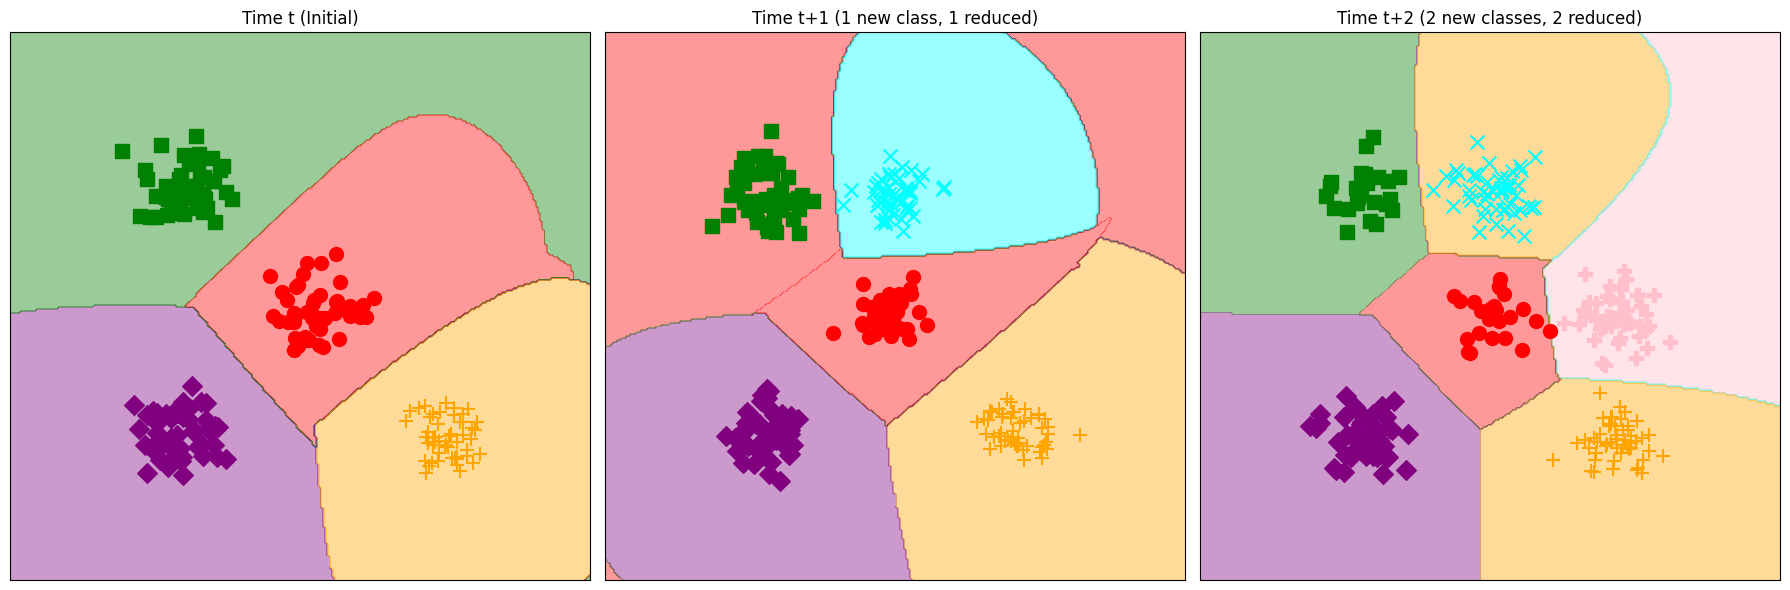

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

# Settings
num_classes_initial = 4  # 初始的类数量
num_classes_final = 6  # 最终的类数量（新类的引入）
points_per_class_initial = 50  # 增加每类的样本量
scaling_factor_no_overlap = 0.5
boundary_noise = 0.05  # 更小的噪声偏移，使噪声点更靠近边界
num_noise_points = 5  # 每个类别的噪声点数量
distinct_colors = [
    "#FFAAAA",
    "#AAFFAA",
    "#FFC0CB",
    "#FFFFAA",
    "#AAFFFF",
    "#FFAACC",
]  # 包含新类的颜色
colors = ["red", "green", "purple", "orange", "cyan", "pink"]  # 新类的颜色
noise_colors = [
    "#FF6666",
    "#66FF66",
    "#9966FF",
    "#FFCC66",
    "#66FFFF",
    "#FF99CC",
]  # 与类别颜色稍微不同的噪声点颜色
class_markers = ["o", "s", "D", "+", "x", "P"]

# Generate initial class centers (仅使用初始类的中心)
class_centers_initial = np.array([[0, 0], [-3, 3], [-3, -3], [3, -3]])
class_centers_final = np.array(
    [[0, 0], [-3, 3], [-3, -3], [3, -3], [0, 3], [3, 0]]
)  # 新类的中心

# Generate points for each class at time t (初始时刻)
points_initial = np.vstack(
    [
        np.random.randn(points_per_class_initial, 2) * scaling_factor_no_overlap
        + center
        for center in class_centers_initial
    ]
)

# Labels for the points
labels_initial = np.repeat(np.arange(num_classes_initial), points_per_class_initial)

# Standardize the initial points for better SVM results
scaler = StandardScaler()
points_standardized_initial = scaler.fit_transform(points_initial)

# Train an SVM classifier
svm_initial = SVC(kernel="rbf", C=1.0, gamma=0.7)
svm_initial.fit(points_standardized_initial, labels_initial)

# 模拟t+1时刻 - 新增1个类，并减少1个现有类的样本
points_t1 = np.vstack(
    [
        (
            np.random.randn(int(points_per_class_initial * 0.7), 2)
            * scaling_factor_no_overlap
            + center  # 减少现有类
            if i == 0
            else np.random.randn(points_per_class_initial, 2)
            * scaling_factor_no_overlap
            + center
        )
        for i, center in enumerate(class_centers_final[:5])  # 新增1个类
    ]
)
labels_t1 = np.repeat(
    np.arange(5), [int(points_per_class_initial * 0.7)] + [points_per_class_initial] * 4
)

# 模拟t+2时刻 - 新增2个类，并减少2个现有类的样本
points_t2 = np.vstack(
    [
        (
            np.random.randn(int(points_per_class_initial * 0.5), 2)
            * scaling_factor_no_overlap
            + center  # 减少现有类
            if i < 2
            else np.random.randn(points_per_class_initial, 2)
            * scaling_factor_no_overlap
            + center
        )
        for i, center in enumerate(class_centers_final)  # 新增2个类
    ]
)
labels_t2 = np.repeat(
    np.arange(6),
    [int(points_per_class_initial * 0.5)] * 2 + [points_per_class_initial] * 4,
)

# 标准化新的点
points_standardized_t1 = scaler.transform(points_t1)
points_standardized_t2 = scaler.transform(points_t2)

# 重新训练SVM模型
svm_t1 = SVC(kernel="rbf", C=1.0, gamma=0.7)
svm_t2 = SVC(kernel="rbf", C=1.0, gamma=0.7)
svm_t1.fit(points_standardized_t1, labels_t1)
svm_t2.fit(points_standardized_t2, labels_t2)


# Create a function to plot the decision boundaries
def plot_decision_boundaries(points, labels, svm_model, ax, title):
    h = 0.02
    x_min, x_max = points[:, 0].min() - 1, points[:, 0].max() + 1
    y_min, y_max = points[:, 1].min() - 1, points[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the decision boundaries for each point in the mesh
    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Ensure background matches the correct class label colors
    color_map = {
        i: colors[i] for i in range(len(np.unique(labels)))
    }  # Map labels to colors
    ax.contourf(
        xx, yy, Z, alpha=0.4, cmap=ListedColormap([color_map[i] for i in np.unique(Z)])
    )

    # Plot the points with matching colors
    for i in np.unique(labels):
        points_class = points[labels == i]
        ax.scatter(
            points_class[:, 0],
            points_class[:, 1],
            c=colors[i],
            marker=class_markers[i],
            s=100,
        )

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title)


# Plot for each time step
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for time t
plot_decision_boundaries(
    points_standardized_initial,
    labels_initial,
    svm_initial,
    axes[0],
    "Time t (Initial)",
)

# Plot for time t+1
plot_decision_boundaries(
    points_standardized_t1,
    labels_t1,
    svm_t1,
    axes[1],
    "Time t+1 (1 new class, 1 reduced)",
)

# Plot for time t+2
plot_decision_boundaries(
    points_standardized_t2,
    labels_t2,
    svm_t2,
    axes[2],
    "Time t+2 (2 new classes, 2 reduced)",
)

plt.tight_layout()
plt.show()

# scenario 3


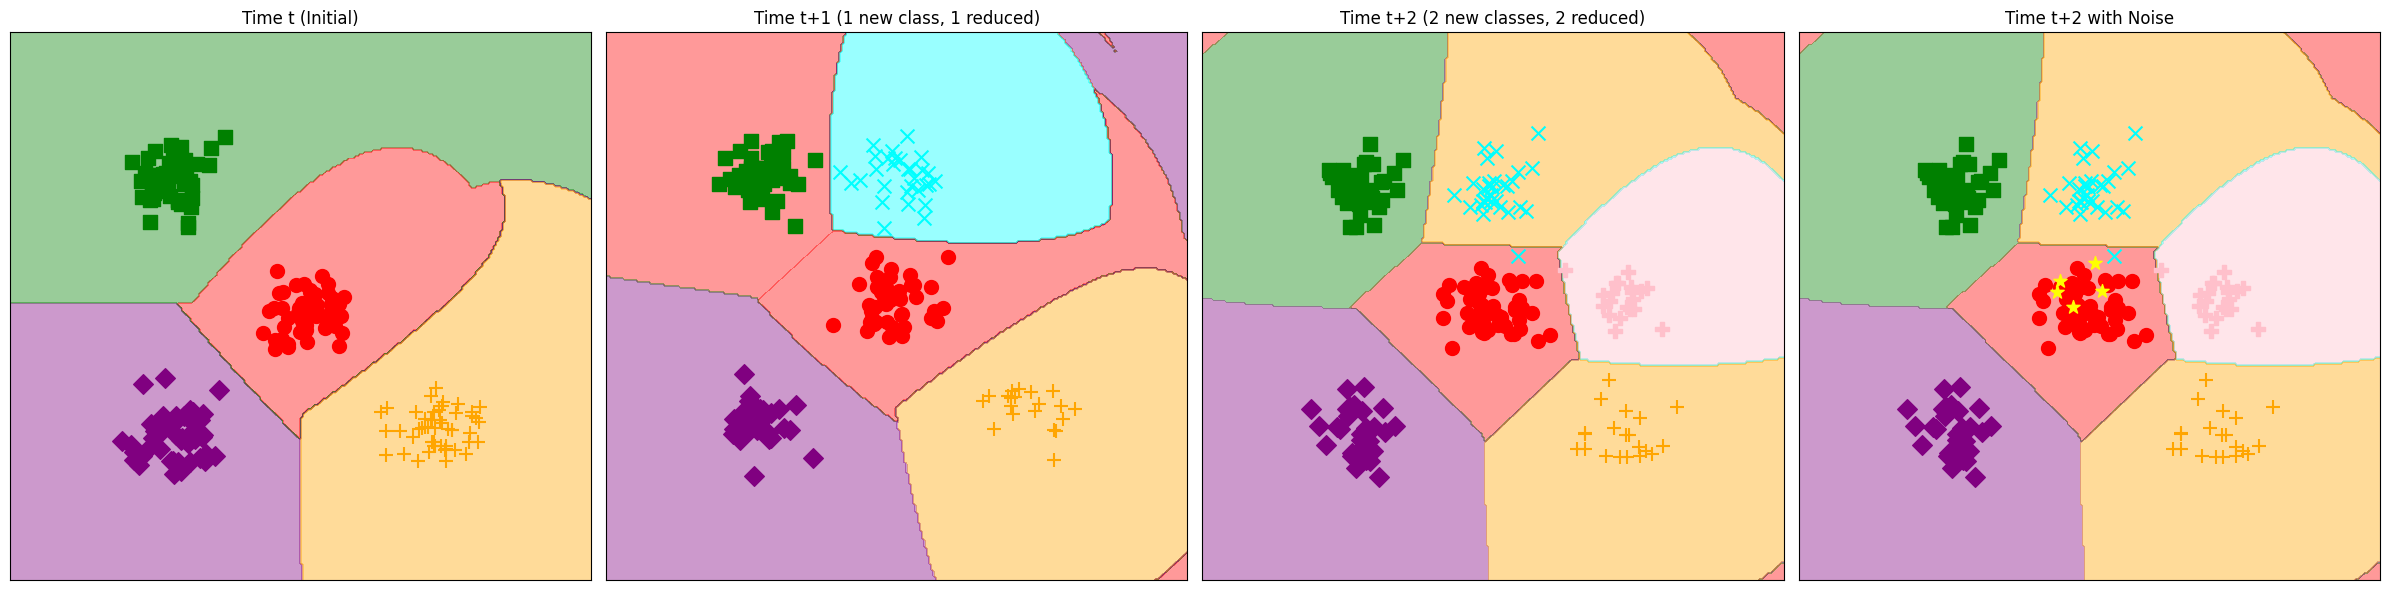

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

# Settings
num_classes_initial = 4
num_classes_final = 6
points_per_class_initial = 50
points_per_class_reduced = [50, 40, 30, 20, 30, 20]  # 更新长度，确保有足够的元素
scaling_factor_no_overlap = 0.5
boundary_noise = 0.05
num_noise_points = 5  # 每个时间步增加的噪声点数量

# 增加颜色列表的长度
distinct_colors = [
    "#FFAAAA",
    "#AAFFAA",
    "#FFC0CB",
    "#FFFFAA",
    "#AAFFFF",
    "#FFAACC",
    "#FFD700",
    "#98FB98",
]
colors = ["red", "green", "purple", "orange", "cyan", "pink", "yellow", "lightgreen"]
noise_colors = ["#FF6666", "#66FF66", "#9966FF", "#FFCC66", "#66FFFF", "#FF99CC"]
class_markers = ["o", "s", "D", "+", "x", "P", "*", "H"]

# Generate initial class centers
class_centers_initial = np.array([[0, 0], [-3, 3], [-3, -3], [3, -3]])
class_centers_final = np.array([[0, 0], [-3, 3], [-3, -3], [3, -3], [0, 3], [3, 0]])


# Function to plot decision boundaries
def plot_decision_boundaries(points, labels, svm_model, ax, title):
    h = 0.02
    x_min, x_max = points[:, 0].min() - 1, points[:, 0].max() + 1
    y_min, y_max = points[:, 1].min() - 1, points[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 确保有足够的颜色分配给所有类别
    unique_labels = np.unique(labels)
    color_map = {i: colors[i] for i in range(len(unique_labels))}
    ax.contourf(
        xx, yy, Z, alpha=0.4, cmap=ListedColormap([color_map[i] for i in np.unique(Z)])
    )

    for i in unique_labels:
        points_class = points[labels == i]
        ax.scatter(
            points_class[:, 0],
            points_class[:, 1],
            c=colors[i],
            marker=class_markers[i],
            s=100,
        )

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title)


# Initial data at time t0
points_initial = np.vstack(
    [
        np.random.randn(points_per_class_initial, 2) * scaling_factor_no_overlap
        + center
        for center in class_centers_initial
    ]
)
labels_initial = np.repeat(np.arange(num_classes_initial), points_per_class_initial)


# 数据随时间变化
def generate_time_varying_data(t):
    """
    生成不同时间步的数据变化
    t: 时间步长，0 表示初始，1 表示 t+1，2 表示 t+2
    """
    if t == 0:
        return points_initial, labels_initial

    elif t == 1:
        # 新增一个类，并减少某些类的样本量
        points_t1 = np.vstack(
            [
                np.random.randn(points_per_class_reduced[i], 2)
                * scaling_factor_no_overlap
                + center
                for i, center in enumerate(class_centers_final[:5])
            ]  # 新增一个类
        )
        labels_t1 = np.repeat(np.arange(5), points_per_class_reduced[:5])
        return points_t1, labels_t1

    elif t == 2:
        # 新增两个类，并减少多个类的样本量，同时增加噪声点
        points_t2 = np.vstack(
            [
                np.random.randn(points_per_class_reduced[i], 2)
                * scaling_factor_no_overlap
                + center
                for i, center in enumerate(class_centers_final)
            ]  # 新增两个类
        )
        labels_t2 = np.repeat(np.arange(6), points_per_class_reduced[:6])
        return points_t2, labels_t2


# 标准化和训练模型
scaler = StandardScaler()
points_standardized_initial = scaler.fit_transform(points_initial)
svm_initial = SVC(kernel="rbf", C=1.0, gamma=0.7).fit(
    points_standardized_initial, labels_initial
)

# 生成时间步 t+1 和 t+2 的数据
points_t1, labels_t1 = generate_time_varying_data(1)
points_t2, labels_t2 = generate_time_varying_data(2)

points_standardized_t1 = scaler.transform(points_t1)
points_standardized_t2 = scaler.transform(points_t2)

# 训练 SVM 模型
svm_t1 = SVC(kernel="rbf", C=1.0, gamma=0.7).fit(points_standardized_t1, labels_t1)
svm_t2 = SVC(kernel="rbf", C=1.0, gamma=0.7).fit(points_standardized_t2, labels_t2)

# 将所有图排列在一排
fig, axes = plt.subplots(1, 4, figsize=(24, 6))

# Initial data at t0
plot_decision_boundaries(
    points_standardized_initial,
    labels_initial,
    svm_initial,
    axes[0],
    "Time t (Initial)",
)

# Time t+1
plot_decision_boundaries(
    points_standardized_t1,
    labels_t1,
    svm_t1,
    axes[1],
    "Time t+1 (1 new class, 1 reduced)",
)

# Time t+2
plot_decision_boundaries(
    points_standardized_t2,
    labels_t2,
    svm_t2,
    axes[2],
    "Time t+2 (2 new classes, 2 reduced)",
)

# 噪声随时间变化
points_noisy = np.vstack(
    [
        points_t2,
        np.random.randn(num_noise_points, 2) * scaling_factor_no_overlap
        + np.mean(points_t2, axis=0),
    ]
)
labels_noisy = np.hstack(
    [labels_t2, np.full(num_noise_points, len(class_centers_final))]
)

points_standardized_noisy = scaler.transform(points_noisy)

# Train SVM with noisy data
svm_noisy = SVC(kernel="rbf", C=1.0, gamma=0.7).fit(
    points_standardized_noisy, labels_noisy
)

# Plot noisy decision boundary at t+2 with noise
plot_decision_boundaries(
    points_standardized_noisy, labels_noisy, svm_noisy, axes[3], "Time t+2 with Noise"
)

plt.tight_layout()
plt.show()

# scenario 4


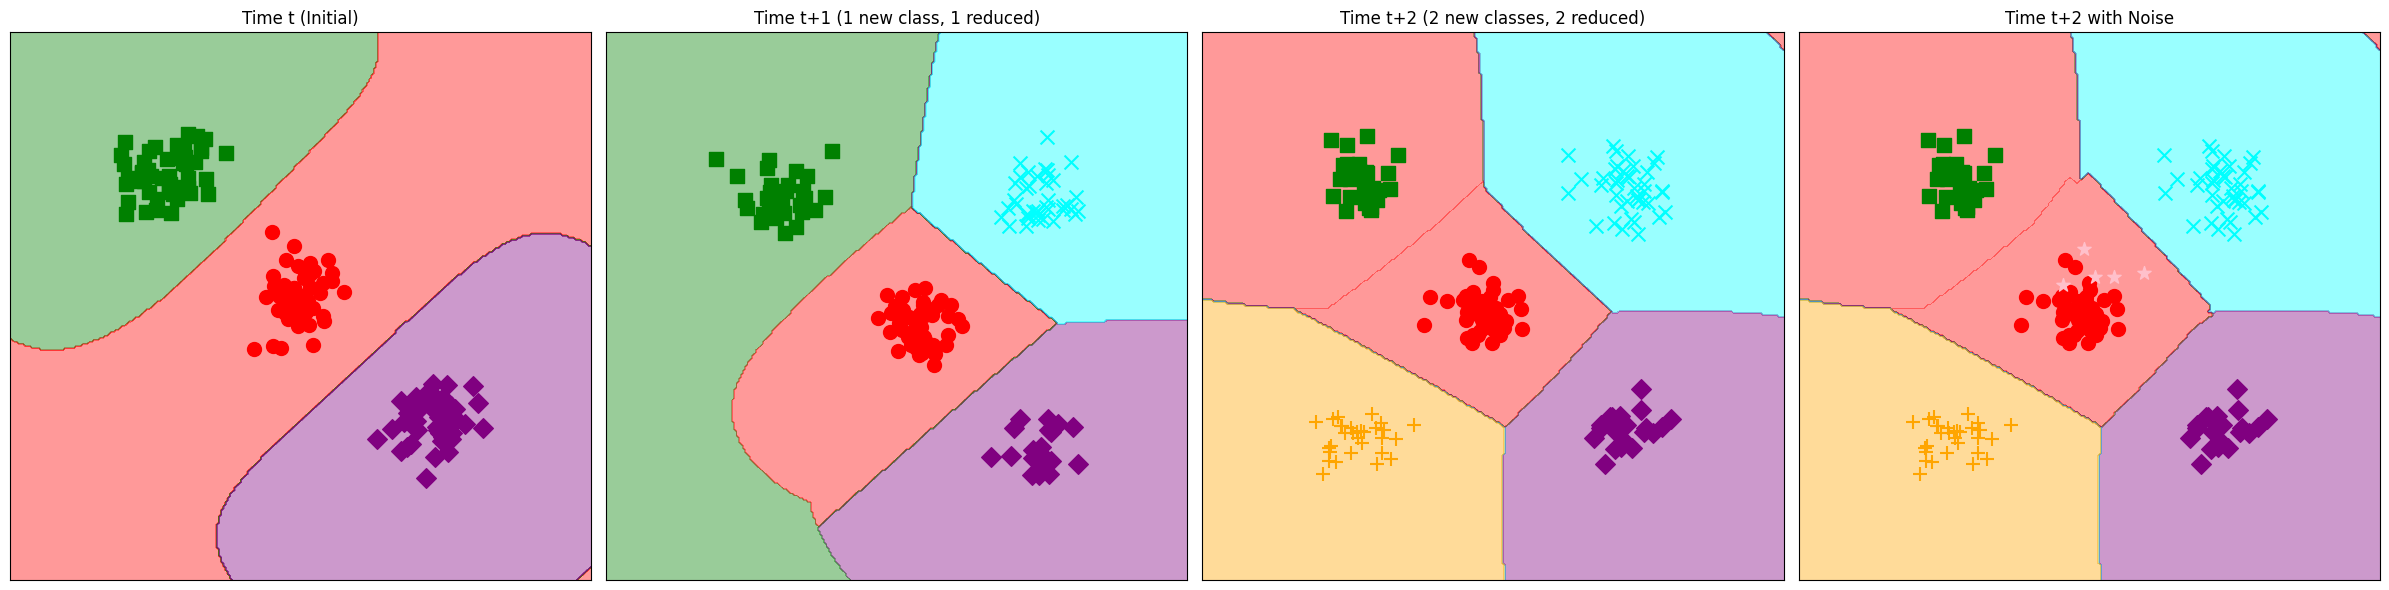

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

# Settings
num_classes_initial = 3  # 初始时保留 3 个类
num_classes_final = 5  # 最终引入 2 个新类
points_per_class_initial = 50
points_per_class_reduced = [50, 30, 20, 40, 30]  # 后续时间步对应的样本量变化
scaling_factor_no_overlap = 0.5
boundary_noise = 0.05
num_noise_points = 5  # 每个时间步增加的噪声点数量

# 增加颜色列表的长度，包含噪声点的颜色
distinct_colors = ["#FFAAAA", "#AAFFAA", "#FFC0CB", "#FFFFAA", "#AAFFFF", "#FFAACC"]
colors = ["red", "green", "purple", "cyan", "orange", "pink"]  # 增加噪声类颜色
class_markers = ["o", "s", "D", "x", "+", "*"]  # 同样为噪声类分配标记符号

# Generate initial class centers
class_centers_initial = np.array([[0, 0], [-3, 3], [3, -3]])  # 只保留 3 个类的中心点
class_centers_final = np.array(
    [[0, 0], [-3, 3], [3, -3], [3, 3], [-3, -3]]
)  # 最终引入 2 个新类


# Function to plot decision boundaries
def plot_decision_boundaries(points, labels, svm_model, ax, title):
    h = 0.02
    x_min, x_max = points[:, 0].min() - 1, points[:, 0].max() + 1
    y_min, y_max = points[:, 1].min() - 1, points[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 确保有足够的颜色分配给所有类别，包括噪声类
    unique_labels = np.unique(labels)
    color_map = {i: colors[i] for i in range(len(unique_labels))}
    ax.contourf(
        xx, yy, Z, alpha=0.4, cmap=ListedColormap([color_map[i] for i in np.unique(Z)])
    )

    for i in unique_labels:
        points_class = points[labels == i]
        ax.scatter(
            points_class[:, 0],
            points_class[:, 1],
            c=colors[i],
            marker=class_markers[i],
            s=100,
        )

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title)


# Initial data at time t0
points_initial = np.vstack(
    [
        np.random.randn(points_per_class_initial, 2) * scaling_factor_no_overlap
        + center
        for center in class_centers_initial
    ]
)
labels_initial = np.repeat(np.arange(num_classes_initial), points_per_class_initial)


# 数据随时间变化
def generate_time_varying_data(t):
    """
    生成不同时间步的数据变化
    t: 时间步长，0 表示初始，1 表示 t+1，2 表示 t+2
    """
    if t == 0:
        return points_initial, labels_initial

    elif t == 1:
        # 新增一个类，并减少某些类的样本量
        points_t1 = np.vstack(
            [
                np.random.randn(points_per_class_reduced[i], 2)
                * scaling_factor_no_overlap
                + center
                for i, center in enumerate(class_centers_final[:4])
            ]  # 新增一个类
        )
        labels_t1 = np.repeat(np.arange(4), points_per_class_reduced[:4])
        return points_t1, labels_t1

    elif t == 2:
        # 新增两个类，并减少多个类的样本量，同时增加噪声点
        points_t2 = np.vstack(
            [
                np.random.randn(points_per_class_reduced[i], 2)
                * scaling_factor_no_overlap
                + center
                for i, center in enumerate(class_centers_final)
            ]  # 新增两个类
        )
        labels_t2 = np.repeat(np.arange(5), points_per_class_reduced[:5])
        return points_t2, labels_t2


# 标准化和训练模型
scaler = StandardScaler()
points_standardized_initial = scaler.fit_transform(points_initial)
svm_initial = SVC(kernel="rbf", C=1.0, gamma=0.7).fit(
    points_standardized_initial, labels_initial
)

# 生成时间步 t+1 和 t+2 的数据
points_t1, labels_t1 = generate_time_varying_data(1)
points_t2, labels_t2 = generate_time_varying_data(2)

points_standardized_t1 = scaler.transform(points_t1)
points_standardized_t2 = scaler.transform(points_t2)

# 训练 SVM 模型
svm_t1 = SVC(kernel="rbf", C=1.0, gamma=0.7).fit(points_standardized_t1, labels_t1)
svm_t2 = SVC(kernel="rbf", C=1.0, gamma=0.7).fit(points_standardized_t2, labels_t2)

# 将所有图排列在一排
fig, axes = plt.subplots(1, 4, figsize=(24, 6))

# Initial data at t0
plot_decision_boundaries(
    points_standardized_initial,
    labels_initial,
    svm_initial,
    axes[0],
    "Time t (Initial)",
)

# Time t+1
plot_decision_boundaries(
    points_standardized_t1,
    labels_t1,
    svm_t1,
    axes[1],
    "Time t+1 (1 new class, 1 reduced)",
)

# Time t+2
plot_decision_boundaries(
    points_standardized_t2,
    labels_t2,
    svm_t2,
    axes[2],
    "Time t+2 (2 new classes, 2 reduced)",
)

# 噪声随时间变化
points_noisy = np.vstack(
    [
        points_t2,
        np.random.randn(num_noise_points, 2) * scaling_factor_no_overlap
        + np.mean(points_t2, axis=0),
    ]
)
labels_noisy = np.hstack(
    [labels_t2, np.full(num_noise_points, len(class_centers_final))]
)

points_standardized_noisy = scaler.transform(points_noisy)

# Train SVM with noisy data
svm_noisy = SVC(kernel="rbf", C=1.0, gamma=0.7).fit(
    points_standardized_noisy, labels_noisy
)

# Plot noisy decision boundary at t+2 with noise
plot_decision_boundaries(
    points_standardized_noisy, labels_noisy, svm_noisy, axes[3], "Time t+2 with Noise"
)

plt.tight_layout()
plt.show()

# scenario 5


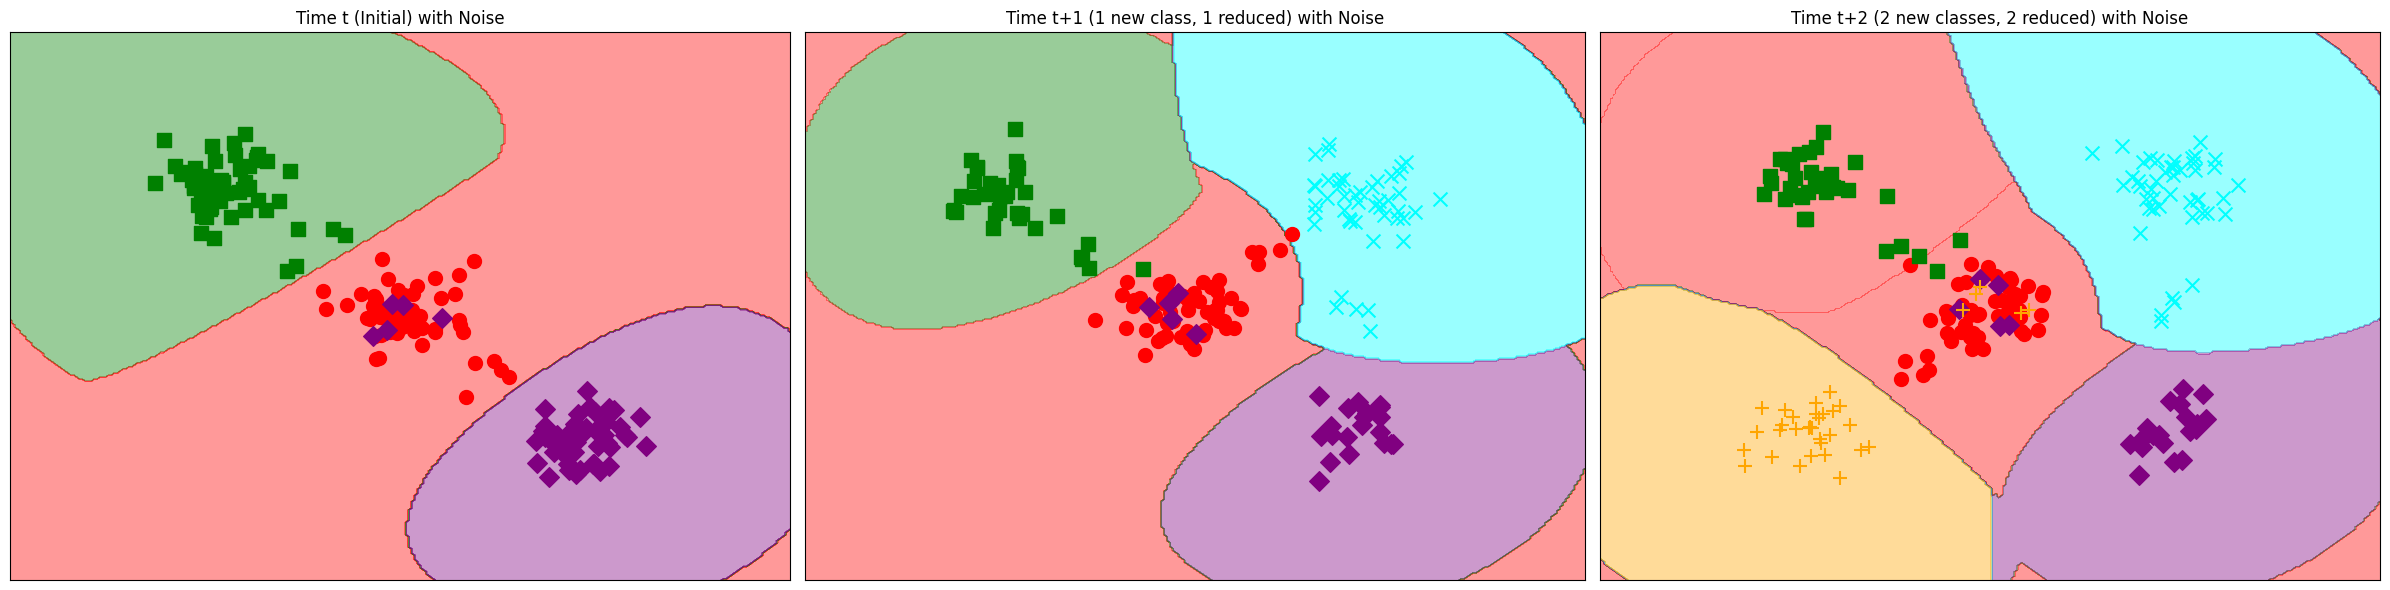

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

# Settings
num_classes_initial = 3  # 初始时保留 3 个类
num_classes_final = 5     # 最终引入 2 个新类
points_per_class_initial = 50
points_per_class_reduced = [50, 30, 20, 40, 30]  # 后续时间步对应的样本量变化
scaling_factor_no_overlap = 0.5
boundary_noise = 0.05
num_noise_points = 5  # 每个时间步增加的噪声点数量

# 增加颜色列表的长度，包含噪声点的颜色
distinct_colors = ["#FFAAAA", "#AAFFAA", "#FFC0CB", "#FFFFAA", "#AAFFFF", "#FFAACC"]
colors = ["red", "green", "purple", "cyan", "orange", "pink"]  # 增加噪声类颜色
class_markers = ["o", "s", "D", "x", "+", "*"]  # 同样为噪声类分配标记符号

# Generate initial class centers
class_centers_initial = np.array([[0, 0], [-3, 3], [3, -3]])  # 只保留 3 个类的中心点
class_centers_final = np.array([[0, 0], [-3, 3], [3, -3], [3, 3], [-3, -3]])  # 最终引入 2 个新类

# Function to plot decision boundaries
def plot_decision_boundaries(points, labels, svm_model, ax, title):
    h = 0.02
    x_min, x_max = points[:, 0].min() - 1, points[:, 0].max() + 1
    y_min, y_max = points[:, 1].min() - 1, points[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # 确保有足够的颜色分配给所有类别，包括噪声类
    unique_labels = np.unique(labels)
    color_map = {i: colors[i] for i in range(len(unique_labels))}
    ax.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap([color_map[i] for i in np.unique(Z)]))
    
    for i in unique_labels:
        points_class = points[labels == i]
        ax.scatter(points_class[:, 0], points_class[:, 1], c=colors[i], marker=class_markers[i], s=100)
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title)

# Generate noise points near the boundaries of different classes
def generate_boundary_noise(points, labels, num_noise_points):
    noise_points = []
    noise_labels = []
    unique_labels = np.unique(labels)
    
    for i in range(len(unique_labels)):
        # 获取当前类别和相邻类别的点
        points_class = points[labels == unique_labels[i]]
        adjacent_label = (i + 1) % len(unique_labels)  # 获取下一个相邻类
        points_adjacent = points[labels == adjacent_label]
        
        # 生成的噪声点数量与 num_noise_points 保持一致
        num_points = min(len(points_class), len(points_adjacent), num_noise_points)
        
        # 从 points_class 和 points_adjacent 中选出 num_points 个点来生成噪声
        selected_points_class = points_class[np.random.choice(len(points_class), num_points, replace=False)]
        selected_adjacent_points = points_adjacent[np.random.choice(len(points_adjacent), num_points, replace=True)]
        
        # 生成噪声点靠近相邻类边界
        noise = np.mean([selected_points_class, selected_adjacent_points], axis=0) + np.random.randn(num_points, 2) * boundary_noise
        noise_points.append(noise)
        noise_labels.append(np.full(num_points, adjacent_label))  # 噪声点标记为相邻类
        
    noise_points = np.vstack(noise_points)
    noise_labels = np.hstack(noise_labels)
    
    return noise_points, noise_labels

# Initial data at time t0
points_initial = np.vstack(
    [np.random.randn(points_per_class_initial, 2) * scaling_factor_no_overlap + center
     for center in class_centers_initial]
)
labels_initial = np.repeat(np.arange(num_classes_initial), points_per_class_initial)

# 为初始数据生成边界噪声点
noise_initial, noise_labels_initial = generate_boundary_noise(points_initial, labels_initial, num_noise_points)
points_initial_with_noise = np.vstack([points_initial, noise_initial])
labels_initial_with_noise = np.hstack([labels_initial, noise_labels_initial])

# 数据随时间变化
def generate_time_varying_data(t):
    """ 
    生成不同时间步的数据变化，并添加噪声点
    t: 时间步长，0 表示初始，1 表示 t+1，2 表示 t+2
    """
    if t == 0:
        return points_initial_with_noise, labels_initial_with_noise
    
    elif t == 1:
        # 新增一个类，并减少某些类的样本量
        points_t1 = np.vstack(
            [np.random.randn(points_per_class_reduced[i], 2) * scaling_factor_no_overlap + center
             for i, center in enumerate(class_centers_final[:4])]  # 新增一个类
        )
        labels_t1 = np.repeat(np.arange(4), points_per_class_reduced[:4])
        
        # 为 t+1 数据生成边界噪声点
        noise_t1, noise_labels_t1 = generate_boundary_noise(points_t1, labels_t1, num_noise_points)
        points_t1_with_noise = np.vstack([points_t1, noise_t1])
        labels_t1_with_noise = np.hstack([labels_t1, noise_labels_t1])
        
        return points_t1_with_noise, labels_t1_with_noise
    
    elif t == 2:
        # 新增两个类，并减少多个类的样本量，同时增加噪声点
        points_t2 = np.vstack(
            [np.random.randn(points_per_class_reduced[i], 2) * scaling_factor_no_overlap + center
             for i, center in enumerate(class_centers_final)]  # 新增两个类
        )
        labels_t2 = np.repeat(np.arange(5), points_per_class_reduced[:5])
        
        # 为 t+2 数据生成边界噪声点
        noise_t2, noise_labels_t2 = generate_boundary_noise(points_t2, labels_t2, num_noise_points)
        points_t2_with_noise = np.vstack([points_t2, noise_t2])
        labels_t2_with_noise = np.hstack([labels_t2, noise_labels_t2])
        
        return points_t2_with_noise, labels_t2_with_noise

# 标准化和训练模型
scaler = StandardScaler()
points_standardized_initial = scaler.fit_transform(points_initial_with_noise)
svm_initial = SVC(kernel="rbf", C=1.0, gamma=0.7).fit(points_standardized_initial, labels_initial_with_noise)

# 生成时间步 t+1 和 t+2 的数据
points_t1, labels_t1 = generate_time_varying_data(1)
points_t2, labels_t2 = generate_time_varying_data(2)

points_standardized_t1 = scaler.transform(points_t1)
points_standardized_t2 = scaler.transform(points_t2)

# 训练 SVM 模型
svm_t1 = SVC(kernel="rbf", C=1.0, gamma=0.7).fit(points_standardized_t1, labels_t1)
svm_t2 = SVC(kernel="rbf", C=1.0, gamma=0.7).fit(points_standardized_t2, labels_t2)

# 将所有图排列在一排
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# Initial data at t0
plot_decision_boundaries(points_standardized_initial, labels_initial_with_noise, svm_initial, axes[0], "Time t (Initial) with Noise")

# Time t+1
plot_decision_boundaries(points_standardized_t1, labels_t1, svm_t1, axes[1], "Time t+1 (1 new class, 1 reduced) with Noise")

# Time t+2
plot_decision_boundaries(points_standardized_t2, labels_t2, svm_t2, axes[2], "Time t+2 (2 new classes, 2 reduced) with Noise")

plt.tight_layout()
plt.show()


In [ ]:
import torchvision.datasets as datasets

trainset = datasets.MNIST(
    root="./data",  # 表示 MNIST 数据的加载的目录
    train=True,  # 表示是否加载数据库的训练集，false的时候加载测试集
    download=True,  # 表示是否自动下载 MNIST 数据集
    transform=None,
)  # 表示是否需要对数据进行预处理，none为不进行预处理